# Οι πληθυσμιακές κατανομές

In [3]:
import pandas as pd
from pathlib import Path


def read_reg_lines(path:Path) -> pd.DataFrame:
    return pd.read_csv(path)

In [112]:
# Population (ανά χώρα, wide format)
path1 = Path(
    r"F:\\απο  την επιφανια  εργασια\\create data\\setdata\\code\\population_continent.csv"
)
population_set = read_reg_lines(path1)

# Migration stock (ανά χώρα, wide format)
path2 = Path(
    r"F:\\απο  την επιφανια  εργασια\\create data\\setdata\\code\\migration_stock_total_1990_2024.csv"
)
migration_total_stock = read_reg_lines(path2)


In [ ]:
# Τακτοποιηση  εντικετων στηλων χωρις  κενα
population_set.columns = (
    population_set.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("[^a-z0-9_]", "", regex=True)
)


migration_total_stock.columns = (
    migration_total_stock.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
      .str.replace("[^a-z0-9_]", "", regex=True)
)

Index(['continent', 'year', 'population', 'data_complete'], dtype='object')


In [167]:
migration_total_stock.describe()

,id,1990,1995,2000,2005,2010,2015,2020,2024
count,235.000000,2.330000e+02,2.330000e+02,2.330000e+02,2.330000e+02,2.330000e+02,2.330000e+02,2.330000e+02,2.330000e+02
mean,118.000000,6.605840e+05,7.003262e+05,7.492110e+05,8.274194e+05,9.485854e+05,1.073142e+06,1.181477e+06,1.304815e+06
std,67.982841,2.018606e+06,2.303450e+06,2.661374e+06,2.974134e+06,3.314660e+06,3.632053e+06,3.847572e+06,4.052167e+06
min,1.000000,1.780000e+02,1.170000e+02,1.080000e+02,1.630000e+02,2.200000e+02,2.300000e+02,2.390000e+02,2.460000e+02
25%,59.500000,2.035900e+04,2.271300e+04,2.386100e+04,2.474100e+04,2.890500e+04,3.207500e+04,3.285800e+04,3.412000e+04
50%,118.000000,9.811600e+04,1.093430e+05,1.235290e+05,1.228490e+05,1.264820e+05,1.525620e+05,1.879550e+05,1.959370e+05
75%,176.500000,4.570750e+05,5.183380e+05,5.261720e+05,5.976580e+05,5.876460e+05,7.215400e+05,8.751700e+05,1.085090e+06
max,235.000000,2.326615e+07,2.852572e+07,3.480685e+07,3.954583e+07,4.394721e+07,4.794299e+07,5.047103e+07,5.237505e+07


In [26]:
population_set.describe()

,year,population
count,320.000000,3.200000e+02
mean,1991.500000,1.085223e+09
std,18.501885,1.200698e+09
min,1960.000000,1.581739e+07
25%,1975.750000,4.145794e+08
50%,1991.500000,7.188848e+08
75%,2007.250000,1.025056e+09
max,2023.000000,4.740398e+09


In [166]:

migration_total_stock['continent'].describe()

count        235
unique         5
top       Africa
freq          58
Name: continent, dtype: object

In [28]:
migration_total_stock.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         235 non-null    int64  
 1   country    235 non-null    object 
 2   region     235 non-null    object 
 3   continent  235 non-null    object 
 4   1990       233 non-null    float64
 5   1995       233 non-null    float64
 6   2000       233 non-null    float64
 7   2005       233 non-null    float64
 8   2010       233 non-null    float64
 9   2015       233 non-null    float64
 10  2020       233 non-null    float64
 11  2024       233 non-null    float64
dtypes: float64(8), int64(1), object(3)
memory usage: 22.2+ KB


In [29]:
migration_total_stock[['country', 'continent']].drop_duplicates().describe()


,country,continent
count,235,235
unique,235,5
top,Burundi,Africa
freq,1,58


In [30]:
# Μετασχηματισμός σε long format ΧΩΡΙΣ year_cols hardcoding
year_cols = migration_total_stock.columns[4:]

migration_long = migration_total_stock.melt(
    id_vars=['country', 'continent'],
    value_vars=year_cols,
    var_name='year',
    value_name='migrants'
)

migration_long["year"] = migration_long["year"].astype(int)
migration_long

,country,continent,year,migrants
0,Burundi,Africa,1990,333110.0
1,Comoros,Africa,1990,14079.0
2,Djibouti,Africa,1990,122221.0
3,Eritrea,Africa,1990,11848.0
4,Ethiopia,Africa,1990,875325.0
...,...,...,...,...
1875,Samoa,OCEANIA,2024,3843.0
1876,Tokelau,OCEANIA,2024,1282.0
1877,Tonga,OCEANIA,2024,3581.0
1878,Tuvalu,OCEANIA,2024,246.0


In [168]:
migration_long.drop_duplicates().describe()

,year,migrants
count,1880.000000,1.864000e+03
mean,2007.375000,9.306948e+05
std,11.271733,3.178084e+06
min,1990.000000,1.080000e+02
25%,1998.750000,2.679600e+04
50%,2007.500000,1.308270e+05
75%,2016.250000,6.325718e+05
max,2024.000000,5.237505e+07


In [169]:
# Υλοποίηση (με προστασία από κενά δεδομένα)
# Slope ανά χώρα (γραμμική τάση 1990–2024)
import numpy as np
import matplotlib.pyplot as plt

country_slopes = (
    migration_long
    .dropna(subset=["migrants"])
    .groupby(["country", "continent"])
    .filter(lambda x: x["migrants"].notna().sum() >= 2)
    .groupby(["country", "continent"])
    .apply(lambda x: np.polyfit(x["year"], x["migrants"], 1)[0], include_groups=False)
    .reset_index(name="slope")
)

country_slopes

,country,continent,slope
0,Afghanistan,ASIA,3595.247324
1,Albania,EUROPE,-813.903408
2,Algeria,Africa,-438.971699
3,American Samoa,OCEANIA,35.444075
4,Andorra,EUROPE,183.078258
...,...,...,...
228,Wallis and Futuna Islands,OCEANIA,14.961117
229,Western Sahara,Africa,94.634798
230,Yemen,ASIA,9688.955211
231,Zambia,Africa,-3049.446536


In [170]:
# Slope ανά ήπειρο (aggregate πριν τη στάθμιση)
#Πρώτα: άθροιση μεταναστών ανά ήπειρο & έτος

continent_year = (
    migration_long
    .groupby(["continent", "year"], as_index=False)["migrants"]
    .sum()
)
continent_year

,continent,year,migrants
0,ASIA,1990,46701075.0
1,ASIA,1995,44841283.0
2,ASIA,2000,47648238.0
3,ASIA,2005,51580428.0
4,ASIA,2010,64340258.0
5,ASIA,2015,78349845.0
6,ASIA,2020,84664604.0
7,ASIA,2024,92170302.0
8,Africa,1990,16176915.0
9,Africa,1995,16653698.0


In [171]:
# Υπολογισμός slope ανά ήπειρο

continent_slopes = (
    continent_year
    .groupby("continent")
    .apply(lambda x: np.polyfit(x["year"], x["migrants"], 1)[0], include_groups=False)
    .reset_index(name="slope")
)
continent_slopes

,continent,slope
0,ASIA,1.503415e+06
1,Africa,3.774310e+05
2,EUROPE,1.174515e+06
3,Latin America and the Caribbean,1.290743e+06
4,OCEANIA,1.600407e+05


In [172]:
from pathlib import Path
import matplotlib.pyplot as plt

# Φάκελος εξόδου
OUTPUT_DIR = Path("setdata/return/")
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Γενικές ρυθμίσεις ποιότητας
plt.rcParams["figure.dpi"] = 120
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["font.size"] = 10


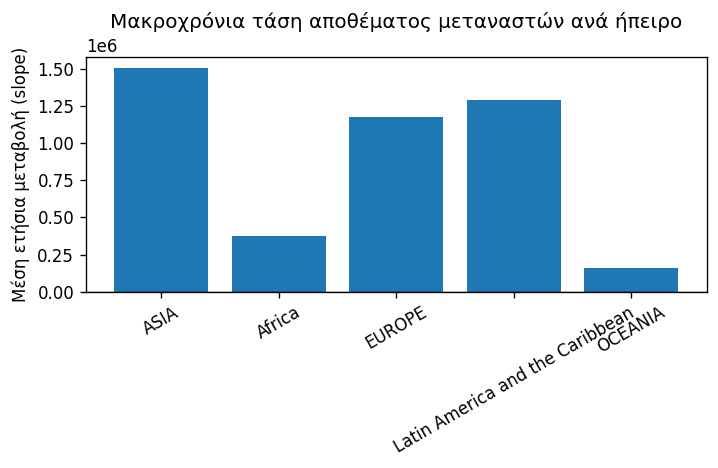

In [173]:
# Διάγραμμα: slope ανά ήπειρο

fig, ax = plt.subplots(figsize=(6, 4))
plt.bar(continent_slopes["continent"], continent_slopes["slope"])
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Μακροχρόνια τάση αποθέματος μεταναστών ανά ήπειρο")
plt.ylabel("Μέση ετήσια μεταβολή (slope)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()



# continent_sorted = continent_slopes.sort_values("slope", ascending=False)

# fig, ax = plt.subplots(figsize=(6, 4))

# plt.bar(continent_sorted["continent"], continent_sorted["slope"])
# plt.title("Μακροχρόνια τάση αποθέματος μεταναστών ανά ήπειρο")
# plt.ylabel("Μέση ετήσια μεταβολή (άτομα / έτος)")
# plt.tight_layout()
# plt.show()

fig.savefig("preliminary_continent_slope_comparison.png")
fig.savefig("preliminary_continent_slope_comparison.svg")
plt.close(fig)




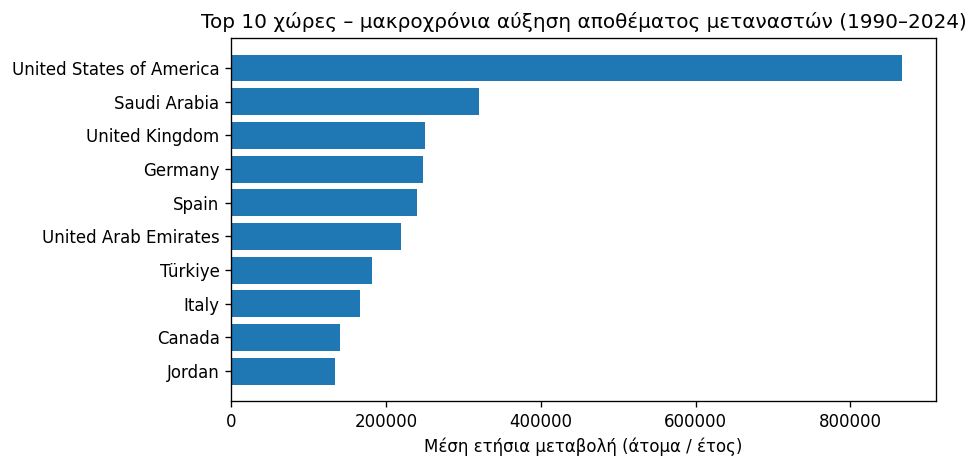

In [159]:
# ΠΡΙΝ τη στάθμιση — συγκριτικά γραφήματα χωρών
# Top 10 χώρες (ισχυρότερη θετική τάση)

# top10 = country_slopes.sort_values("slope", ascending=False).head(10)

# plt.figure(figsize=(9, 15))
# plt.barh(top10["country"], top10["slope"])
# plt.axvline(0, color="black")
# plt.title("Top 10 χώρες με τη μεγαλύτερη αύξηση αποθέματος μεταναστών")
# plt.xlabel("Slope (μέση ετήσια μεταβολή)")
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()

top10 = (
    country_slopes
    .sort_values("slope", ascending=False)
    .head(10)
)

fig, ax = plt.subplots(figsize=(8, 4))

plt.barh(top10["country"], top10["slope"])
plt.gca().invert_yaxis()

plt.title("Top 10 χώρες – μακροχρόνια αύξηση αποθέματος μεταναστών (1990–2024)")
plt.xlabel("Μέση ετήσια μεταβολή (άτομα / έτος)")
plt.tight_layout()
plt.show()




fig.tight_layout()
fig.savefig("preliminary_top10_countries_positive_slope.png")
fig.savefig("preliminary_top10_countries_positive_slope.svg")
plt.close(fig)



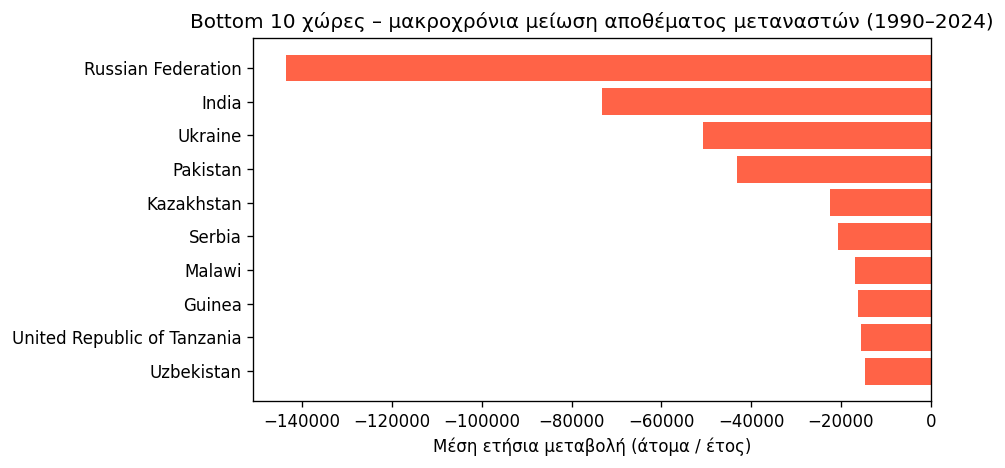

In [123]:
# Bottom 10 χώρες (ισχυρότερη μείωση)

# bottom10 = country_slopes.sort_values("slope", ascending=True).head(10)

# plt.figure(figsize=(15, 18))
# plt.barh(bottom10["country"], bottom10["slope"], color="tomato")
# plt.axvline(0, color="black")
# plt.title("Bottom 10 χώρες με τη μεγαλύτερη μείωση αποθέματος μεταναστών")
# plt.xlabel("Slope (μέση ετήσια μεταβολή)")
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()


bottom10 = (
    country_slopes
    .sort_values("slope", ascending=True)
    .head(10)
)

fig, ax = plt.subplots(figsize=(8, 4))
plt.barh(bottom10["country"], bottom10["slope"], color="tomato")
plt.gca().invert_yaxis()

plt.title("Bottom 10 χώρες – μακροχρόνια μείωση αποθέματος μεταναστών (1990–2024)")
plt.xlabel("Μέση ετήσια μεταβολή (άτομα / έτος)")
plt.tight_layout()
plt.show()




fig.savefig("preliminary_bottom10_countries_negative_slope.png")
fig.savefig( "preliminary_bottom10_countries_negative_slope.svg")
plt.close(fig)




In [37]:
# «Αδιάφορες» χώρες (σχεδόν μηδενική τάση)

# threshold = country_slopes["slope"].abs().median() * 0.05

# neutral = country_slopes[
#     country_slopes["slope"].abs() < threshold
# ]

# neutral.head(10)

neutral = country_slopes[
    country_slopes["slope"].abs() < 100
].sort_values("slope")


neutral


,country,continent,slope
86,Greenland,Latin America and the Caribbean,-79.481358
192,Solomon Islands,OCEANIA,-61.464501
48,Comoros,Africa,-55.790329
206,Timor-Leste,ASIA,-41.153808
161,Papua New Guinea,OCEANIA,-38.916328
197,Sri Lanka,ASIA,-27.110496
136,Micronesia (Fed. States of),OCEANIA,-22.657315
145,Nauru,OCEANIA,-17.375292
180,Samoa,OCEANIA,-13.538575
140,Montserrat,Latin America and the Caribbean,-12.207826


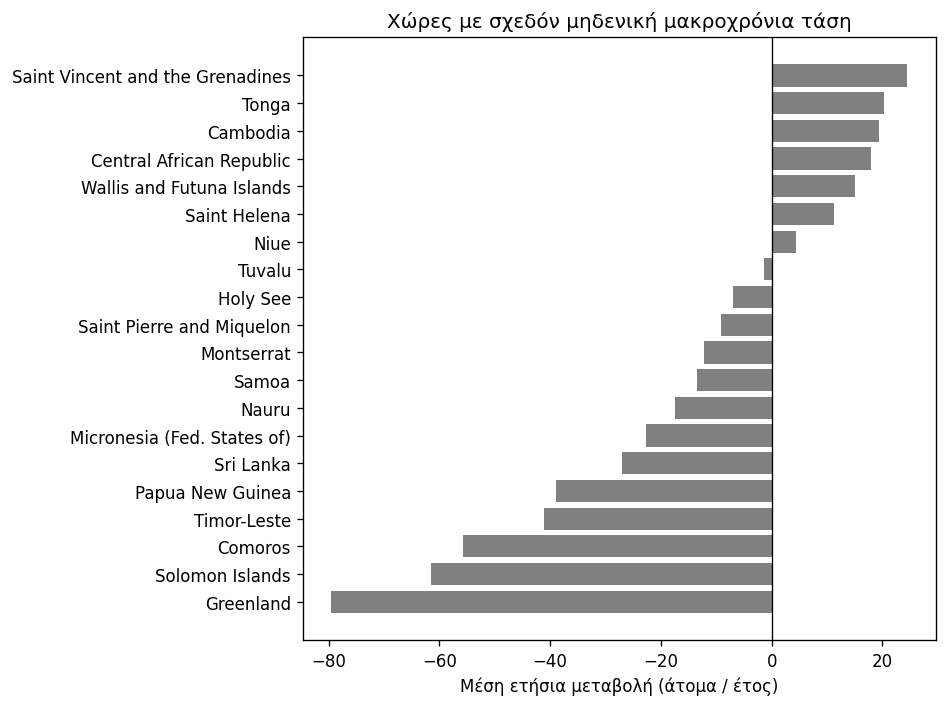

In [125]:
# «Αδιάφορες» χώρες
# neutral_sample = neutral.head(50)

# plt.figure(figsize=(18, 18))
# plt.barh(neutral_sample["country"], neutral_sample["slope"], color="gray")
# plt.axvline(0, color="black")
# plt.title("Χώρες με σχεδόν μηδενική μακροχρόνια τάση")
# plt.xlabel("Slope")
# plt.gca().invert_yaxis()
# plt.tight_layout()
# plt.show()


neutral20 = neutral.head(20)

fig, ax = plt.subplots(figsize=(8, 6))

plt.barh(neutral20["country"], neutral20["slope"], color="gray")
plt.axvline(0, color="black", linewidth=0.8)

plt.title("Χώρες με σχεδόν μηδενική μακροχρόνια τάση")
plt.xlabel("Μέση ετήσια μεταβολή (άτομα / έτος)")
plt.tight_layout()
plt.show()

fig.savefig("preliminary_neutral_countries_near_zero_slope.png")
fig.savefig("preliminary_neutral_countries_near_zero_slope.svg")
plt.close(fig)


In [38]:
#ΒΗΜΑ 1 — Μετασχηματισμός σε long format (ΑΠΑΡΑΙΤΗΤΟ)
# μία παρατήρηση = (χώρα, έτος, migrants)
import pandas as pd
import numpy as np

# Strip whitespace from all column names
migration_total_stock.columns = migration_total_stock.columns.astype(str).str.strip()

# Now try the melt (using strings as the safest bet)
df_long = migration_total_stock.melt(
    id_vars=["country", "continent"],
    value_vars=["1990", "1995", "2000", "2005", "2010", "2015", "2020", "2024"],
    var_name="year",
    value_name="migrants"
)


df_long["year"] = df_long["year"].astype(int)
df_long


,country,continent,year,migrants
0,Burundi,Africa,1990,333110.0
1,Comoros,Africa,1990,14079.0
2,Djibouti,Africa,1990,122221.0
3,Eritrea,Africa,1990,11848.0
4,Ethiopia,Africa,1990,875325.0
...,...,...,...,...
1875,Samoa,OCEANIA,2024,3843.0
1876,Tokelau,OCEANIA,2024,1282.0
1877,Tonga,OCEANIA,2024,3581.0
1878,Tuvalu,OCEANIA,2024,246.0


In [39]:
# ΒΗΜΑ 2 — Υπολογισμός slope ανά χώρα (απλός, καθαρός)

from scipy.stats import linregress

def compute_slope(group):
    clean = group.dropna(subset=["migrants"])
    if len(clean) < 2:
        return np.nan
    return linregress(clean["year"], clean["migrants"]).slope

country_slopes = (
    df_long
    .groupby(["country", "continent"])
    .apply(compute_slope, include_groups=False)
    .reset_index(name="slope")
)


In [40]:
# ΒΗΜΑ 3.1 — Ορισμός μπλοκ (ΑΝΤΙΚΕΙΜΕΝΙΚΟΣ)

threshold = country_slopes["slope"].abs().quantile(0.25)
threshold

np.float64(361.8191214470284)

In [41]:
# ΒΗΜΑ 3.2 — Ορισμός μπλοκ (ΑΝΤΙΚΕΙΜΕΝΙΚΟΣ)

country_slopes["block"] = np.where(
    country_slopes["slope"] > threshold, "Top (↑)",
    np.where(country_slopes["slope"] < -threshold, "Bottom (↓)", "Neutral (≈)")
)
country_slopes

,country,continent,slope,block
0,Afghanistan,ASIA,3595.247324,Top (↑)
1,Albania,EUROPE,-813.903408,Bottom (↓)
2,Algeria,Africa,-438.971699,Bottom (↓)
3,American Samoa,OCEANIA,35.444075,Neutral (≈)
4,Andorra,EUROPE,183.078258,Neutral (≈)
...,...,...,...,...
230,Wallis and Futuna Islands,OCEANIA,14.961117,Neutral (≈)
231,Western Sahara,Africa,94.634798,Neutral (≈)
232,Yemen,ASIA,9688.955211,Top (↑)
233,Zambia,Africa,-3049.446536,Bottom (↓)


In [42]:
# ΒΗΜΑ 4 — ΠΙΝΑΚΑΣ ΣΥΝΟΨΗΣ ΜΠΛΟΚ (ΑΥΤΟ ΠΟΥ ΖΗΤΗΣΕΣ)
# 4.1 Πλήθος χωρών ανά μπλοκ

block_summary = (
    country_slopes
    .groupby("block")
    .agg(
        countries=("country", "count")
    )
    .reset_index()
)

block_summary["percent"] = (
    block_summary["countries"] / block_summary["countries"].sum() * 100
)

block_summary

,block,countries,percent
0,Bottom (↓),44,18.723404
1,Neutral (≈),61,25.957447
2,Top (↑),130,55.319149


In [43]:
# ΒΗΜΑ 5 — (ΠΡΟΑΙΡΕΤΙΚΟ αλλά πολύ δυνατό)
# Ποιο βάρος εκπροσωπεί κάθε μπλοκ;

latest = df_long[df_long["year"] == 2024][["country", "migrants"]]

country_slopes = country_slopes.merge(latest, on="country", how="left")
country_slopes


,country,continent,slope,block,migrants
0,Afghanistan,ASIA,3595.247324,Top (↑),98110.0
1,Albania,EUROPE,-813.903408,Bottom (↓),46377.0
2,Algeria,Africa,-438.971699,Bottom (↓),259458.0
3,American Samoa,OCEANIA,35.444075,Neutral (≈),23684.0
4,Andorra,EUROPE,183.078258,Neutral (≈),48408.0
...,...,...,...,...,...
230,Wallis and Futuna Islands,OCEANIA,14.961117,Neutral (≈),2032.0
231,Western Sahara,Africa,94.634798,Neutral (≈),5628.0
232,Yemen,ASIA,9688.955211,Top (↑),392997.0
233,Zambia,Africa,-3049.446536,Bottom (↓),249205.0


In [44]:
# Άθροισμα μεταναστών ανά μπλοκ:

# Rename migrants_x back to migrants
country_slopes = country_slopes.rename(columns={"migrants_x": "migrants"})

# Now your original code will work
block_weight = (
    country_slopes
    .groupby("block")
    .agg(
        total_migrants=("migrants", "sum"),
        countries=("country", "count")
    )
    .reset_index()
)

block_weight


,block,total_migrants,countries
0,Bottom (↓),37739480.0,44
1,Neutral (≈),1388549.0,61
2,Top (↑),264893784.0,130


In [165]:
# Πίνακας ανά ήπειρο: ποιο μπλοκ κυριαρχεί

continent_block_summary = (
    country_slopes
    .groupby(["continent", "block"])
    .agg(
        countries=("country", "count"),
        total_migrants=("migrants", "sum")
    )
    .reset_index()
)

# Ποσοστά εντός κάθε ηπείρου
continent_totals = (
    continent_block_summary
    .groupby("continent")[["countries", "total_migrants"]]
    .sum()
    .reset_index()
    .rename(columns={
        "countries": "continent_countries",
        "total_migrants": "continent_migrants"
    })
)

continent_block_summary = continent_block_summary.merge(
    continent_totals, on="continent", how="left"
)

continent_block_summary["countries_pct"] = (
    continent_block_summary["countries"] /
    continent_block_summary["continent_countries"] * 100
)

continent_block_summary["migrants_pct"] = (
    continent_block_summary["total_migrants"] /
    continent_block_summary["continent_migrants"] * 100
)

continent_block_summary


KeyError: 'block'

In [175]:
# Στάθμιση ως προς πληθυσμό (per 1.000 κατοίκους)
# Συγκεντρωτικά migrants ανά ήπειρο & έτος
years_common = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024]

migration_continent = (
    df_long[df_long["year"].isin(years_common)]
    .groupby(["continent", "year"])
    .agg(migrants=("migrants", "sum"))
    .reset_index()
)
migration_continent

,continent,year,migrants
0,ASIA,1990,46701075.0
1,ASIA,1995,44841283.0
2,ASIA,2000,47648238.0
3,ASIA,2005,51580428.0
4,ASIA,2010,64340258.0
5,ASIA,2015,78349845.0
6,ASIA,2020,84664604.0
7,ASIA,2024,92170302.0
8,Africa,1990,16176915.0
9,Africa,1995,16653698.0


In [47]:
# # ΒΗΜΑ 1 — Μετασχηματισμός population σε long format


# Select only the specific years you want
years_to_keep = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024]

# Filter the existing dataframe
population_long = population_set[population_set['year'].isin(years_to_keep)]

# Display results
population_long







,continent,year,population,data_complete
30,Africa,1990,635729166,True
35,Africa,1995,724320660,True
40,Africa,2000,820514280,True
45,Africa,2005,930542719,True
50,Africa,2010,1058450295,True
55,Africa,2015,1204623006,True
60,Africa,2020,1362430327,True
94,Americas,1990,714848441,True
99,Americas,1995,773321562,True
104,Americas,2000,829427389,True


In [48]:
population_continent_f = (
    population_long
    .groupby(["continent","year"])
    .agg(population=("population","sum"))
    .reset_index()
)
population_continent_f

,continent,year,population
0,Africa,1990,635729166
1,Africa,1995,724320660
2,Africa,2000,820514280
3,Africa,2005,930542719
4,Africa,2010,1058450295
5,Africa,2015,1204623006
6,Africa,2020,1362430327
7,Americas,1990,714848441
8,Americas,1995,773321562
9,Americas,2000,829427389


In [179]:
# (γ) Στάθμιση: μετανάστες ανά 1.000 κατοίκους

continent_rates = migration_continent.merge(
    population_continent_f,
    on=["continent", "year"],
    how="inner"
)

continent_rates["rate_per_1000"] = (
    continent_rates["migrants"] /
    continent_rates["population"] * 1000
)

continent_rates


,continent,year,migrants,population,rate_per_1000
0,Africa,1990,16176915.0,635729166,25.446237
1,Africa,1995,16653698.0,724320660,22.992162
2,Africa,2000,15413140.0,820514280,18.784731
3,Africa,2005,16602802.0,930542719,17.842063
4,Africa,2010,17752216.0,1058450295,16.771894
5,Africa,2015,22683929.0,1204623006,18.830729
6,Africa,2020,25267356.0,1362430327,18.545797


In [180]:
# 1. Merge to add the 'block' column
country_slopes = country_slopes.merge(
    continent_block_summary[['continent', 'block']], 
    on='continent', 
    how='left'
)

# 2. Run your original filtering code
top_countries_table = country_slopes[country_slopes["block"] == "Top (↑)"] \
    .sort_values("slope", ascending=False)



In [52]:
top_countries_table.to_csv("preliminary_table_top_countries_positive_slope.csv",
    index=False
)


In [181]:
top_n = 10

top_countries = (
    country_slopes
    .sort_values("slope", ascending=False)
    .head(top_n)
    .copy()
)

# ίδια σειρά και στα δύο πάνελ
top_countries = top_countries.sort_values("slope")


In [182]:
path3 = "F:\\απο  την επιφανια  εργασια\\create data\\setdata\\code\\Population_total.csv"
Population_total = read_reg_lines(path3)
# Population_total.head()
# Population_total.info()

In [183]:
years_common = [1990, 1995, 2000, 2005, 2010, 2015, 2020, 2024]


In [184]:
# 1. Transform the data so years become values in a "year" column
Population_total = Population_total.melt(
    id_vars=['Country Name'], 
    var_name='year', 
    value_name='population'
)

# 2. Now your original line will work
pop = Population_total[Population_total["year"].isin(years_common)].copy()



In [130]:
Population_total['year'] = Population_total['year'].astype(int)


In [97]:
pop_f = Population_total[Population_total["year"].isin(years_common)].copy()
pop_f

,Country Name,year,population
7980,Aruba,1990,62753.0
7981,Africa Eastern and Southern,1990,311748681.0
7982,Afghanistan,1990,12045660.0
7983,Africa Western and Central,1990,209566031.0
7984,Angola,1990,11626360.0
...,...,...,...
17285,Kosovo,2024,1594353.0
17286,"Yemen, Rep.",2024,40583164.0
17287,South Africa,2024,64007187.0
17288,Zambia,2024,21314956.0


In [98]:
pop_avg = (
    pop_f
    .groupby("Country Name", as_index=False)
    .agg(avg_population=("population", "mean"))
)
pop_avg

,Country Name,avg_population
0,Afghanistan,2.718484e+07
1,Africa Eastern and Southern,5.173401e+08
2,Africa Western and Central,3.524680e+08
3,Albania,2.890595e+06
4,Algeria,3.561541e+07
...,...,...
261,West Bank and Gaza,3.605517e+06
262,World,6.776623e+09
263,"Yemen, Rep.",2.595924e+07
264,Zambia,1.363093e+07


In [99]:
# Rename 'country' to 'Country Name' to match pop_avg
country_slopes = country_slopes.rename(columns={'country': 'Country Name'})

# Now your original code will work
country_slopes = country_slopes.merge(
    pop_avg,
    on="Country Name",
    how="left"
)


In [100]:
country_slopes["slope_per_1000"] = (
    country_slopes["slope"] / country_slopes["avg_population"] * 1000
)
country_slopes

,Country Name,continent,slope,avg_population,slope_per_1000
0,Afghanistan,ASIA,3595.247324,2.718484e+07,0.132252
1,Albania,EUROPE,-813.903408,2.890595e+06,-0.281569
2,Algeria,Africa,-438.971699,3.561541e+07,-0.012325
3,American Samoa,OCEANIA,35.444075,5.213250e+04,0.679884
4,Andorra,EUROPE,183.078258,7.147662e+04,2.561372
...,...,...,...,...,...
230,Wallis and Futuna Islands,OCEANIA,14.961117,NaN,NaN
231,Western Sahara,Africa,94.634798,NaN,NaN
232,Yemen,ASIA,9688.955211,NaN,NaN
233,Zambia,Africa,-3049.446536,1.363093e+07,-0.223715


In [101]:
country_slopes.columns


Index(['Country Name', 'continent', 'slope', 'avg_population',
       'slope_per_1000'],
      dtype='object')

In [102]:
country_slopes[["Country Name", "slope", "avg_population", "slope_per_1000"]].head()


,Country Name,slope,avg_population,slope_per_1000
0,Afghanistan,3595.247324,2.718484e+07,0.132252
1,Albania,-813.903408,2.890595e+06,-0.281569
2,Algeria,-438.971699,3.561541e+07,-0.012325
3,American Samoa,35.444075,5.213250e+04,0.679884
4,Andorra,183.078258,7.147662e+04,2.561372


In [103]:
country_slopes_clean = (
    country_slopes
    .drop_duplicates(subset=["Country Name"])
    .reset_index(drop=True)
)


In [104]:
country_slopes_clean["Country Name"].value_counts().head()


Country Name
Afghanistan         1
Papua New Guinea    1
New Zealand         1
Nicaragua           1
Niger               1
Name: count, dtype: int64

In [105]:
top_abs = (
    country_slopes_clean
    .sort_values("slope", ascending=False)
    .head(10)
)


In [106]:
top_weighted = (
    country_slopes_clean
    .sort_values("slope_per_1000", ascending=False)
    .head(10)
)


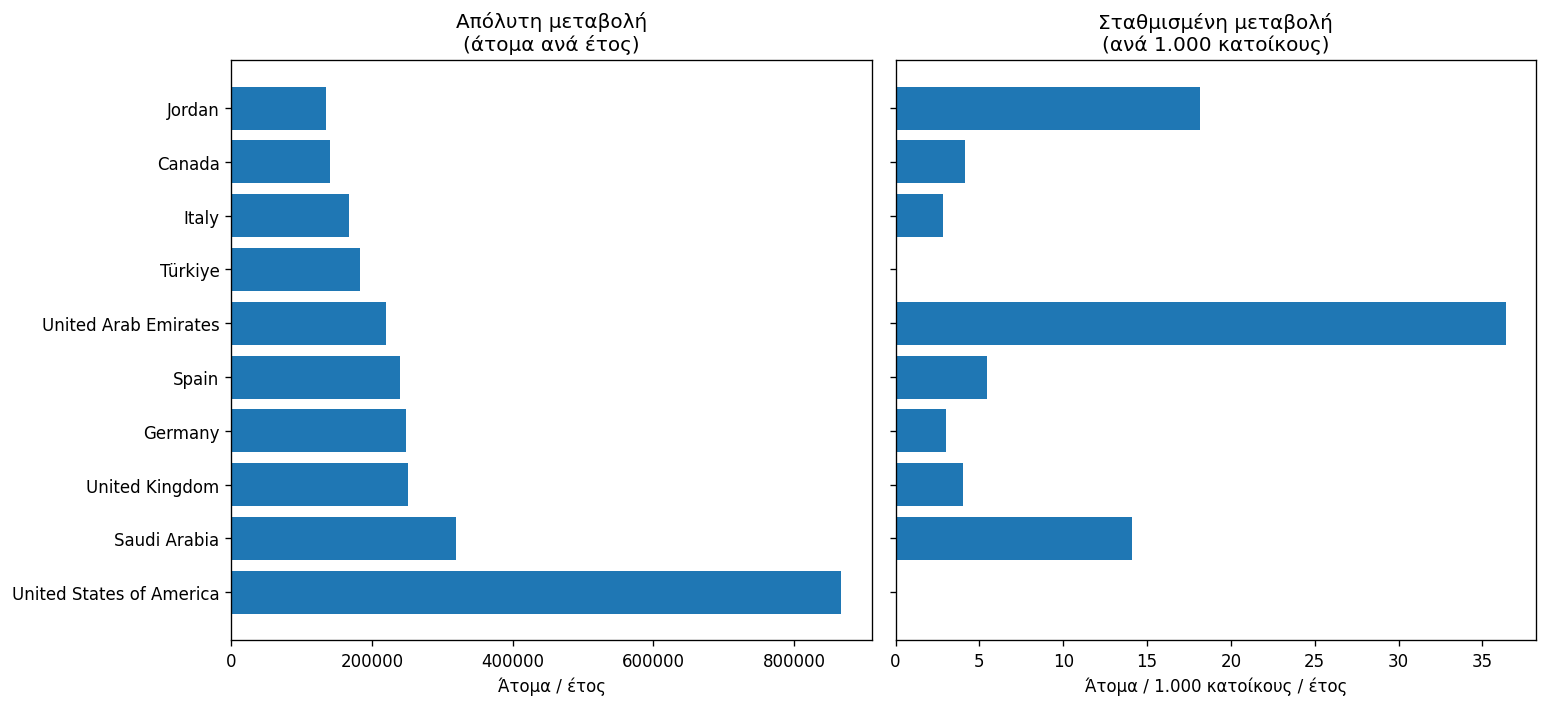

In [69]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(13, 6), sharey=True)

# Absolute
axes[0].barh(
    top_abs["Country Name"],
    top_abs["slope"]
)
axes[0].set_title("Απόλυτη μεταβολή\n(άτομα ανά έτος)")
axes[0].set_xlabel("Άτομα / έτος")

# Weighted
axes[1].barh(
    top_abs["Country Name"],
    top_abs["slope_per_1000"]
)
axes[1].set_title("Σταθμισμένη μεταβολή\n(ανά 1.000 κατοίκους)")
axes[1].set_xlabel("Άτομα / 1.000 κατοίκους / έτος")

plt.tight_layout()
plt.show()


In [107]:
import pandas as pd
import numpy as np

year_cols = ['1990','1995','2000','2005','2010','2015','2020','2024']

migration_long = migration_total_stock.melt(
    id_vars=["country", "continent"],
    value_vars=year_cols,
    var_name="year",
    value_name="migrants"
)

migration_long["year"] = migration_long["year"].astype(int)





In [126]:
from scipy.stats import linregress

def compute_slope(df):
    if df["migrants"].notna().sum() < 2:
        return np.nan
    return linregress(df["year"], df["migrants"]).slope

country_slopes = (
    migration_long
    .groupby(["country", "continent"])
    .apply(compute_slope, include_groups=False)
    .reset_index(name="slope")
)


In [127]:
Population_total.columns


Index(['Country Name', 'year', 'population'], dtype='object')

In [134]:
# Το dataset είναι ήδη long
population_long = Population_total.copy()

# (προαιρετικός έλεγχος)
population_long["year"] = population_long["year"].astype(int)

# Το dataset είναι ήδη long
avg_population = (
    population_long
    .groupby("Country Name")["population"]
    .mean()
    .reset_index(name="avg_population")
)


In [135]:
country_metrics = (
    country_slopes
    .merge(
        avg_population,
        left_on="country",
        right_on="Country Name",
        how="left"
    )
)

country_metrics["slope_per_1000"] = (
    country_metrics["slope"] / country_metrics["avg_population"] * 1000
)


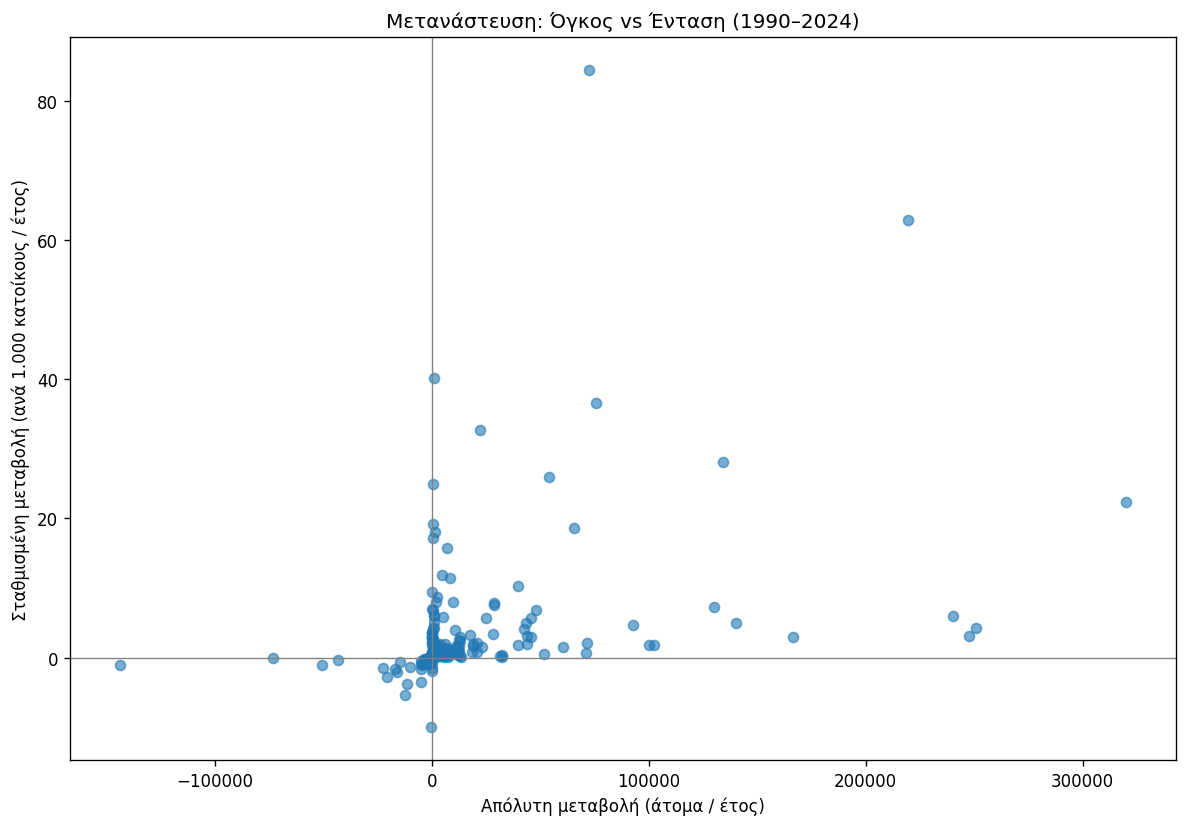

In [136]:
import matplotlib.pyplot as plt

df = country_metrics.dropna(subset=["slope", "slope_per_1000"])

plt.figure(figsize=(10,7))
plt.scatter(df["slope"], df["slope_per_1000"], alpha=0.6)

plt.axhline(0, color="grey", lw=0.8)
plt.axvline(0, color="grey", lw=0.8)

plt.xlabel("Απόλυτη μεταβολή (άτομα / έτος)")
plt.ylabel("Σταθμισμένη μεταβολή (ανά 1.000 κατοίκους / έτος)")
plt.title("Μετανάστευση: Όγκος vs Ένταση (1990–2024)")

plt.tight_layout()
plt.show()


In [139]:
# Όρια με βάση την κατανομή (π.χ. quantiles)
upper = country_metrics["slope"].quantile(0.67)
lower = country_metrics["slope"].quantile(0.33)

country_metrics["block"] = pd.cut(
    country_metrics["slope"],
    bins=[-float("inf"), lower, upper, float("inf")],
    labels=["Bottom (↓)", "Neutral (≈)", "Top (↑)"]
)


In [143]:
country_metrics.columns


Index(['country', 'continent', 'slope', 'Country Name', 'avg_population',
       'slope_per_1000', 'block'],
      dtype='object')

In [141]:
country_metrics["block"].value_counts()


block
Neutral (≈)    79
Bottom (↓)     77
Top (↑)        77
Name: count, dtype: int64

In [152]:
block_summary = (
    country_metrics
    .groupby("block", observed=False)
    .agg(
        countries=("Country Name", "count"),
        avg_slope=("slope", "mean"),
        avg_slope_per_1000=("slope_per_1000", "mean")
    )
    .reset_index()
)

block_summary

,block,countries,avg_slope,avg_slope_per_1000
0,Bottom (↓),58,-7257.131049,-0.812122
1,Neutral (≈),60,1770.286074,4.494038
2,Top (↑),67,63962.217209,7.123114


In [154]:
from pathlib import Path

BASE = Path("return/final/tables")
BASE.mkdir(parents=True, exist_ok=True)

# --- 1. Master table
country_metrics.to_csv(
    BASE / "country_metrics.csv",
    index=False
)

# --- 2. Σύνοψη μπλοκ
block_summary = (
    country_metrics
    .groupby("block", observed=False)
    .agg(
        countries=("country", "count"),
        avg_slope=("slope", "mean"),
        avg_slope_per_1000=("slope_per_1000", "mean")
    )
    .reset_index()
)

block_summary["percent_of_countries"] = (
    block_summary["countries"] / block_summary["countries"].sum() * 100
)

block_summary.to_csv(
    BASE / "block_summary.csv",
    index=False
)

# --- 3. Ανάλυση ανά ήπειρο
block_by_continent = (
    country_metrics
    .groupby(["continent", "block"], observed=False)
    .size()
    .reset_index(name="countries")
)

block_by_continent["percent_within_continent"] = (
    block_by_continent
    .groupby("continent")["countries"]
    .transform(lambda x: x / x.sum() * 100)
)

block_by_continent.to_csv(
    BASE / "block_by_continent.csv",
    index=False
)

# --- 4. Υποσύνολα χωρών
blocks = {
    "Top (↑)": "countries_block_top.csv",
    "Bottom (↓)": "countries_block_bottom.csv",
    "Neutral (≈)": "countries_block_neutral.csv"
}

for block_name, filename in blocks.items():
    country_metrics[country_metrics["block"] == block_name] \
        .to_csv(BASE / filename, index=False)
